# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

## CDC data on Chlamydia

In [72]:
df = pd.read_csv("../data/cdc/chlamydia.csv")

In [5]:
df.shape

(3228, 12)

In [6]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [7]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [8]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [9]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,72,124.4


In [10]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [11]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [12]:
df.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,72,124.4


In [13]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [14]:
df['Population'].idxmax()

207

In [15]:
df.loc[207]

Disease                                    Chlamydia
Area                              Los Angeles County
State Abbreviation                                CA
FIPS                                            6037
Year                                            2014
Race                           All races/ethnicities
Sex                                       Both sexes
Age group                             All age groups
Transmission Category    All transmission categories
Population                               1.00171e+07
Cases                                          54881
Rate                                           547.9
Name: 207, dtype: object

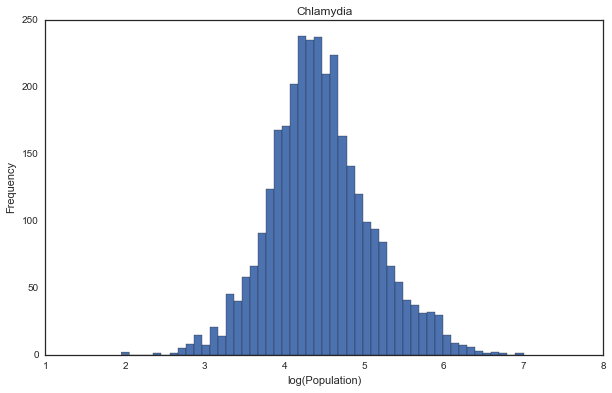

In [16]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_population.png', bbox_inches='tight', dpi=150)

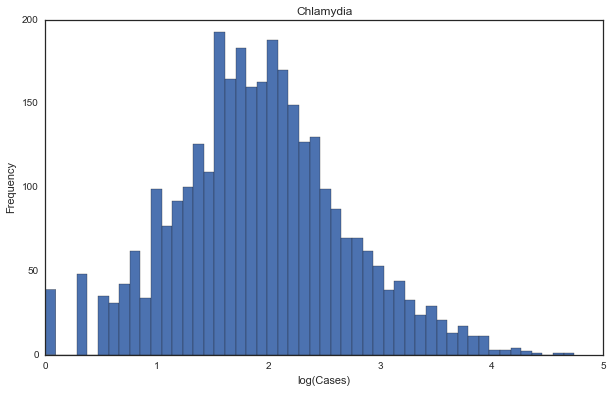

In [17]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_cases.png', bbox_inches='tight', dpi=150)

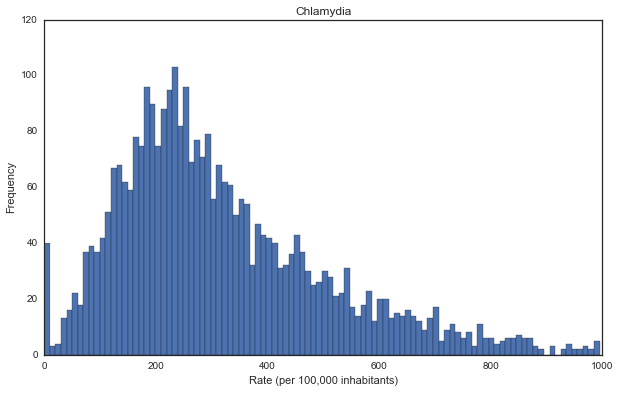

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate (per 100,000 inhabitants)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_rate.png', bbox_inches='tight', dpi=150)

In [19]:
outliers = df[df['Rate']<50]

In [20]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
88,Chlamydia,Prince of Wales - Outer Ketchikan,AK,2201,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,5786,0,0.0
96,Chlamydia,Wrangell-Petersburg Census Area,AK,2280,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,6174,0,0.0
256,Chlamydia,Cheyenne County,CO,8017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1890,0,0.0
274,Chlamydia,Hinsdale County,CO,8053,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,813,0,0.0
278,Chlamydia,Kiowa County,CO,8061,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1423,0,0.0
322,Chlamydia,District Of Columbia,DC,11001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,646449,2,0.3
551,Chlamydia,Kalawao County,HI,15005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,90,0,0.0
565,Chlamydia,Butte County,ID,16023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2642,1,37.9
586,Chlamydia,Madison County,ID,16065,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,37450,15,40.1
902,Chlamydia,Cheyenne County,KS,20023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2694,1,37.1


People in D.C. don't have Chlamydia. Or so it seems.

I will have to remove the entries with very low numbers of Chlamydia cases.

In [21]:
len(df['Area'].unique())

1962

In [22]:
df.shape

(3228, 12)

In [23]:
df.sort_values(by='Area')

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
2319,Chlamydia,Abbeville County,SC,45001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25007,117,467.9
1116,Chlamydia,Acadia Parish,LA,22001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,62204,285,458.2
2823,Chlamydia,Accomack County,VA,51001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,33148,262,790.4
554,Chlamydia,Ada County,ID,16001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,416464,1529,367.1
996,Chlamydia,Adair County,KY,21001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,18732,46,245.6
1486,Chlamydia,Adair County,MO,29001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25572,70,273.7
792,Chlamydia,Adair County,IA,19001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,7472,7,93.7
2134,Chlamydia,Adair County,OK,40001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22194,128,576.7
1657,Chlamydia,Adams County,NE,31001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,31610,87,275.2
700,Chlamydia,Adams County,IN,18001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34614,43,124.2


In [24]:
df['Area'].value_counts()

Washington County            30
Jefferson County             25
Franklin County              24
Lincoln County               23
Jackson County               23
Madison County               19
Clay County                  18
Montgomery County            18
Monroe County                17
Marion County                17
Union County                 17
Wayne County                 16
Grant County                 14
Greene County                14
Warren County                14
Carroll County               13
Lee County                   12
Douglas County               12
Adams County                 12
Johnson County               12
Clark County                 12
Marshall County              12
Polk County                  12
Lake County                  12
Fayette County               11
Morgan County                11
Crawford County              11
Lawrence County              11
Calhoun County               11
Scott County                 11
                             ..
San Jaci

## Get ZIP codes and FIPS codes for counties

We will need a mapping function for ZIP codes and for FIPS codes. ZIP codes are used by USPS and are generally known by the users, whereas governmental studies and CDC data usually use FIPS codes for regions. 

In [25]:
df_fipszip= pd.read_csv("../data/COUNTY_ZIP_122014.csv", usecols={0,1})

In [26]:
df_fipszip.shape

(51280, 2)

In [27]:
df_fipszip.head()

,COUNTY,ZIP
0,1001,36051
1,1001,36066
2,1001,36703
3,1001,36068
4,1001,36749


In [28]:
df_zipfips= pd.read_csv("../data/ZIP_COUNTY_122014.csv", usecols={0,1})

In [29]:
df_zipfips.shape

(51280, 2)

In [30]:
df_zipfips.head()

,ZIP,COUNTY
0,501,36103
1,601,72001
2,602,72003
3,603,72005
4,604,72005


In [31]:
df_zipfips.dtypes

ZIP       int64
COUNTY    int64
dtype: object

In [32]:
zip2fips = dict(zip(df_zipfips["ZIP"], df_zipfips["COUNTY"]))

In [33]:
zip2fips[65536]

29105

In [34]:
fips2zip = {}

In [35]:
for fips in np.arange(len(df_fipszip.COUNTY)):
    if df_fipszip.COUNTY[fips] in fips2zip:
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])
    else:
        fips2zip[df_fipszip.COUNTY[fips]] = []
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])

In [36]:
fips2zip[1001]

[36051,
 36066,
 36703,
 36068,
 36749,
 36006,
 36067,
 36022,
 36091,
 36758,
 36003,
 36008]

In [37]:
df_fipszip.COUNTY[1]

1001

In [38]:
fips2zip[zip2fips[754]]

[754]

In [39]:
df_fipszip['COUNTY'].value_counts()

6037     498
48201    229
17031    225
11001    219
4013     193
6073     178
6059     145
42003    144
48113    140
36061    135
12086    122
6071     122
53033    119
32003    114
36103    111
25017    107
9003     107
6085     106
48439    104
48029    104
6065     104
6019     103
25027    102
42129     94
42091     92
48453     90
26125     90
36029     90
1073      88
12057     87
        ... 
72129      1
72019      1
51515      1
31007      1
48261      1
31117      1
72065      1
72121      1
72125      1
72093      1
51720      1
72027      1
35028      1
48431      1
72045      1
48155      1
51530      1
48271      1
51580      1
48413      1
72051      1
72095      1
72143      1
48137      1
72111      1
48301      1
72079      1
72059      1
72047      1
72043      1
Name: COUNTY, dtype: int64

In [40]:
df_fipszip[df_fipszip["COUNTY"] == 72129]

,COUNTY,ZIP
51244,72129,754


## Census data for counties

In [81]:
df_census = pd.read_csv("../data/census/DEC10.csv", header=1)

In [82]:
df_census.shape

(3143, 375)

In [83]:
df_census.head()

,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under 5 years,Percent; SEX AND AGE - Total population - Under 5 years,Number; SEX AND AGE - Total population - 5 to 9 years,Percent; SEX AND AGE - Total population - 5 to 9 years,Number; SEX AND AGE - Total population - 10 to 14 years,Percent; SEX AND AGE - Total population - 10 to 14 years,Number; SEX AND AGE - Total population - 15 to 19 years,Percent; SEX AND AGE - Total population - 15 to 19 years,Number; SEX AND AGE - Total population - 20 to 24 years,Percent; SEX AND AGE - Total population - 20 to 24 years,Number; SEX AND AGE - Total population - 25 to 29 years,Percent; SEX AND AGE - Total population - 25 to 29 years,Number; SEX AND AGE - Total population - 30 to 34 years,Percent; SEX AND AGE - Total population - 30 to 34 years,Number; SEX AND AGE - Total population - 35 to 39 years,Percent; SEX AND AGE - Total population - 35 to 39 years,Number; SEX AND AGE - Total population - 40 to 44 years,Percent; SEX AND AGE - Total population - 40 to 44 years,Number; SEX AND AGE - Total population - 45 to 49 years,Percent; SEX AND AGE - Total population - 45 to 49 years,Number; SEX AND AGE - Total population - 50 to 54 years,Percent; SEX AND AGE - Total population - 50 to 54 years,Number; SEX AND AGE - Total population - 55 to 59 years,Percent; SEX AND AGE - Total population - 55 to 59 years,Number; SEX AND AGE - Total population - 60 to 64 years,Percent; SEX AND AGE - Total population - 60 to 64 years,Number; SEX AND AGE - Total population - 65 to 69 years,Percent; SEX AND AGE - Total population - 65 to 69 years,Number; SEX AND AGE - Total population - 70 to 74 years,Percent; SEX AND AGE - Total population - 70 to 74 years,Number; SEX AND AGE - Total population - 75 to 79 years,Percent; SEX AND AGE - Total population - 75 to 79 years,Number; SEX AND AGE - Total population - 80 to 84 years,Percent; SEX AND AGE - Total population - 80 to 84 years,Number; SEX AND AGE - Total population - 85 years and over,Percent; SEX AND AGE - Total population - 85 years and over,Number; SEX AND AGE - Total population - Median age (years),Percent; SEX AND AGE - Total population - Median age (years),Number; SEX AND AGE - Total population - 16 years and over,Percent; SEX AND AGE - Total population - 16 years and over,Number; SEX AND AGE - Total population - 18 years and over,Percent; SEX AND AGE - Total population - 18 years and over,Number; SEX AND AGE - Total population - 21 years and over,Percent; SEX AND AGE - Total population - 21 years and over,Number; SEX AND AGE - Total population - 62 years and over,Percent; SEX AND AGE - Total population - 62 years and over,Number; SEX AND AGE - Total population - 65 years and over,Percent; SEX AND AGE - Total population - 65 years and over,Number; SEX AND AGE - Male population,Percent; SEX AND AGE - Male population,Number; SEX AND AGE - Male population - Under 5 years,Percent; SEX AND AGE - Male population - Under 5 years,Number; SEX AND AGE - Male population - 5 to 9 years,Percent; SEX AND AGE - Male population - 5 to 9 years,Number; SEX AND AGE - Male population - 10 to 14 years,Percent; SEX AND AGE - Male population - 10 to 14 years,Number; SEX AND AGE - Male population - 15 to 19 years,Percent; SEX AND AGE - Male population - 15 to 19 years,Number; SEX AND AGE - Male population - 20 to 24 years,Percent; SEX AND AGE - Male population - 20 to 24 years,Number; SEX AND AGE - Male population - 25 to 29 years,Percent; SEX AND AGE - Male population - 25 to 29 years,Number; SEX AND AGE - Male population - 30 to 34 years,Percent; SEX AND AGE - Male population - 30 to 34 years,Number; SEX AND AGE - Male population - 35 to 39 years,Percent; SEX AND AGE - Male population - 35 to 39 years,Number; SEX AND AGE - Male population - 40 to 44 years,Percent; SEX AND AGE - Male population - 40 to 44 years,Number; SEX AND AGE - Male population - 45 to 49 years,Percent; SEX AND AGE - Male 

In [84]:
df_census.dtypes

Id                                                                                                                                     object
Id2                                                                                                                                     int64
Geography                                                                                                                              object
Number; SEX AND AGE - Total population                                                                                                 object
Percent; SEX AND AGE - Total population                                                                                                 int64
Number; SEX AND AGE - Total population - Under 5 years                                                                                  int64
Percent; SEX AND AGE - Total population - Under 5 years                                                                               float64
Number

In [85]:
df_census.convert_objects(convert_numeric=True)

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under 5 years,Percent; SEX AND AGE - Total population - Under 5 years,Number; SEX AND AGE - Total population - 5 to 9 years,Percent; SEX AND AGE - Total population - 5 to 9 years,Number; SEX AND AGE - Total population - 10 to 14 years,Percent; SEX AND AGE - Total population - 10 to 14 years,Number; SEX AND AGE - Total population - 15 to 19 years,Percent; SEX AND AGE - Total population - 15 to 19 years,Number; SEX AND AGE - Total population - 20 to 24 years,Percent; SEX AND AGE - Total population - 20 to 24 years,Number; SEX AND AGE - Total population - 25 to 29 years,Percent; SEX AND AGE - Total population - 25 to 29 years,Number; SEX AND AGE - Total population - 30 to 34 years,Percent; SEX AND AGE - Total population - 30 to 34 years,Number; SEX AND AGE - Total population - 35 to 39 years,Percent; SEX AND AGE - Total population - 35 to 39 years,Number; SEX AND AGE - Total population - 40 to 44 years,Percent; SEX AND AGE - Total population - 40 to 44 years,Number; SEX AND AGE - Total population - 45 to 49 years,Percent; SEX AND AGE - Total population - 45 to 49 years,Number; SEX AND AGE - Total population - 50 to 54 years,Percent; SEX AND AGE - Total population - 50 to 54 years,Number; SEX AND AGE - Total population - 55 to 59 years,Percent; SEX AND AGE - Total population - 55 to 59 years,Number; SEX AND AGE - Total population - 60 to 64 years,Percent; SEX AND AGE - Total population - 60 to 64 years,Number; SEX AND AGE - Total population - 65 to 69 years,Percent; SEX AND AGE - Total population - 65 to 69 years,Number; SEX AND AGE - Total population - 70 to 74 years,Percent; SEX AND AGE - Total population - 70 to 74 years,Number; SEX AND AGE - Total population - 75 to 79 years,Percent; SEX AND AGE - Total population - 75 to 79 years,Number; SEX AND AGE - Total population - 80 to 84 years,Percent; SEX AND AGE - Total population - 80 to 84 years,Number; SEX AND AGE - Total population - 85 years and over,Percent; SEX AND AGE - Total population - 85 years and over,Number; SEX AND AGE - Total population - Median age (years),Percent; SEX AND AGE - Total population - Median age (years),Number; SEX AND AGE - Total population - 16 years and over,Percent; SEX AND AGE - Total population - 16 years and over,Number; SEX AND AGE - Total population - 18 years and over,Percent; SEX AND AGE - Total population - 18 years and over,Number; SEX AND AGE - Total population - 21 years and over,Percent; SEX AND AGE - Total population - 21 years and over,Number; SEX AND AGE - Total population - 62 years and over,Percent; SEX AND AGE - Total population - 62 years and over,Number; SEX AND AGE - Total population - 65 years and over,Percent; SEX AND AGE - Total population - 65 years and over,Number; SEX AND AGE - Male population,Percent; SEX AND AGE - Male population,Number; SEX AND AGE - Male population - Under 5 years,Percent; SEX AND AGE - Male population - Under 5 years,Number; SEX AND AGE - Male population - 5 to 9 years,Percent; SEX AND AGE - Male population - 5 to 9 years,Number; SEX AND AGE - Male population - 10 to 14 years,Percent; SEX AND AGE - Male population - 10 to 14 years,Number; SEX AND AGE - Male population - 15 to 19 years,Percent; SEX AND AGE - Male population - 15 to 19 years,Number; SEX AND AGE - Male population - 20 to 24 years,Percent; SEX AND AGE - Male population - 20 to 24 years,Number; SEX AND AGE - Male population - 25 to 29 years,Percent; SEX AND AGE - Male population - 25 to 29 years,Number; SEX AND AGE - Male population - 30 to 34 years,Percent; SEX AND AGE - Male population - 30 to 34 years,Number; SEX AND AGE - Male population - 35 to 39 years,Percent; SEX AND AGE - Male population - 35 to 39 years,Number; SEX AND AGE - Male population - 40 to 44 years,Percent; SEX AND AGE - Male population - 40 to 44 years,Number; SEX AND AGE - Male population - 45 to 49 years,Percent; SEX AND AGE - Male 

## National statistics for gender, race and age

In [41]:
gender_rate = {}

In [42]:
gender_rate["Male"] = 278.4e-5
gender_rate["Female"] = 627.2e-5

In [43]:
gender_rate["Male"]

0.002784

In [44]:
race_rate = {}

In [45]:
race_rate["Native"] = 689.1e-5
race_rate["Asian"] = 115.8e-5
race_rate["Black"] = 1152.6e-5
race_rate["Hispanic"] = 376.2e-5
race_rate["Multiple"] = 116.1e-5
race_rate["Pacific"] = 641.5e-5
race_rate["White"] = 187.0e-5

We are asking the question of how likely is it that a male/female has an STD given that he/she has a certain race. 

In [46]:
race_rate["Pacific"]*gender_rate["Female"]

4.0234879999999995e-05

In [47]:
race_percentage = {}

In [48]:
race_percentage["Native"] = 1942876.0/316128839.0
race_percentage["Asian"] = 12721721.0/316128839.0
race_percentage["Black"] = 29489649.0/316128839.0
race_percentage["Hispanic"] = 46407173.0/316128839.0
race_percentage["Multiple"] = 5145135.0/316128839.0
race_percentage["Pacific"] = 473703.0/316128839.0
race_percentage["White"] = 161443167.0/316128839.0

In [49]:
race_percentage["Pacific"]

0.0014984491813478619

In [50]:
us_rate = {}

In [51]:
us_rate["Female"] = 627.2e-5
us_rate["Male"] = 278.4e-5

In [52]:
race_rate["Pacific"]*race_percentage["Pacific"]/(race_rate["Pacific"]*race_percentage["Pacific"] + us_rate["Female"]*(1.0-race_percentage["Pacific"]))

0.001532561081611305

In [53]:
races = ["Native", "Asian", "Black", "Hispanic", "Multiple", "Pacific", "White"]

In [54]:
print("Probablity of being of certain race when diagnosed with Chlamydia:")
summ = 0.0
for race in races:
    print(race, race_rate[race]*race_percentage[race]/(race_rate[race]*race_percentage[race] + us_rate["Female"]*(1.0-race_percentage[race])))
    summ += race_rate[race]*race_percentage[race]/(race_rate[race]*race_percentage[race] + us_rate["Female"]*(1.0-race_percentage[race]))

print(summ)

Probablity of being of certain race when diagnosed with Chlamydia:
Native 0.0067482913824340185
Asian 0.007681985567375361
Black 0.1590016849986502
Hispanic 0.09354650159601996
Multiple 0.0030532143156948733
Pacific 0.001532561081611305
White 0.23732548267515421
0.5088897216169399


In [55]:
us_rate["Female"]

0.006272

In [56]:
population = np.random.rand(1000000,3)

In [57]:
for person in np.arange(len(population)):
    if population[person, 0]>0.5:
        population[person,0] = 1  #Female
        if population[person, 1]>us_rate["Female"]:
            population[person,1] = 0  #no STD  
        else:
            population[person,1] = 1  #STD
    else:
        population[person,0] = 0   #Male
        if population[person, 1]>us_rate["Male"]:
            population[person,1] = 0  #no STD
        else:
            population[person,1] = 1  #STD

    if population[person, 2]>race_rate["Pacific"]:
        population[person,2] = 0   #other
    else:
        population[person,1] = 1   #Pacific

        




In [58]:
population

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [59]:
summ_h = 0
for person in np.arange(len(population)):
    if population[person,0] == 1 and population[person,1] == 1 and population[person,2] == 1:
        summ_h += 1


In [60]:
summ_h

0

In [70]:
i=0.0
gender = 0
race = 0
std = 0
summ_h = 0.0
while i < 100000000.0:
    if np.random.rand()>0.5:
        gender = 1
        if np.random.rand()>us_rate["Female"]:
            std = 0  #no STD  
        else:
            std = 1  #STD
    else:
        gender = 0   #Male
        if np.random.rand()>us_rate["Male"]:
            std = 0  #no STD
        else:
            std = 1  #STD

    if np.random.rand()>race_percentage["Pacific"]:
        race = 0   #other
    else:
        race = 1   #Pacific

    if gender == 1 and std == 1 and race == 1:
        summ_h += 1.0
    i+=1.0
    
print(summ_h)

501.0
